<img src="./images/banner.png" width="800">

# Polynomial Regression and Overfitting

Polynomial regression is a powerful extension of linear regression that allows us to model non-linear relationships between variables. By understanding polynomial regression, we can capture more complex patterns in our data and gain insights into the limitations of linear models.


Linear regression assumes a linear relationship between the independent variable(s) and the dependent variable. However, real-world data often exhibits non-linear patterns that simple linear models can't adequately capture.


🔑 **Key Concept:** Polynomial regression allows us to fit a non-linear curve to our data while still using the framework of linear regression.


Consider a dataset where the relationship between x and y is clearly non-linear:


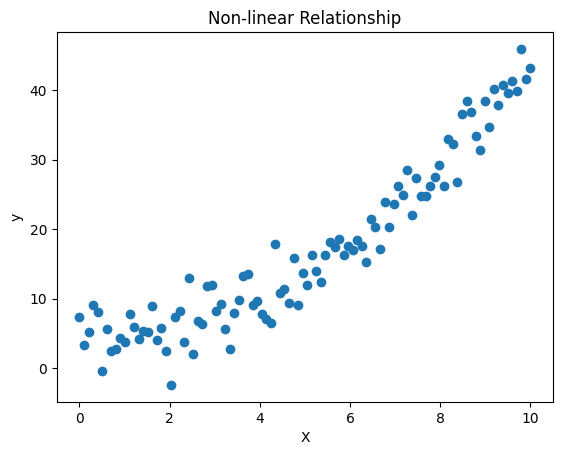

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 0.3 * X**2 + X + 2 + np.random.randn(100, 1) * 3

plt.scatter(X, y)
plt.title("Non-linear Relationship")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

A straight line would poorly fit this data, but a polynomial curve could capture the underlying pattern much better.


**Polynomial regression** introduces higher-order terms of the independent variable(s) into the regression equation. The general form of a polynomial regression model is:

$$ y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + ... + \beta_nx^n + \epsilon $$

Where:
- $y$ is the dependent variable
- $x$ is the independent variable
- $\beta_0, \beta_1, ..., \beta_n$ are the coefficients to be estimated
- $n$ is the degree of the polynomial
- $\epsilon$ is the error term


<img src="./images/polynomial.png" width="800">

<img src="./images/polynomial-2.png" width="800">

💡 **Pro Tip:** Despite its non-linear appearance, polynomial regression is still considered a form of multiple linear regression. The "linear" refers to the linearity in parameters ($\beta$), not the relationship between x and y.


Polynomial regression offers several advantages over linear regression. Here are a few key benefits:

1. **Flexibility:** Can model a wide range of non-linear relationships.
2. **Interpretability:** The coefficients still have clear interpretations related to the curve's shape.
3. **Simplicity:** Uses the same estimation techniques as linear regression (e.g., ordinary least squares).


While polynomial regression offers greater flexibility, it comes with risks:
1. **Overfitting:** Higher-degree polynomials can fit the noise in the data, leading to poor generalization.
2. **Extrapolation Issues:** Polynomial models can behave erratically outside the range of the training data.
3. **Multicollinearity:** Higher-order terms can be highly correlated, potentially causing instability in coefficient estimates.


Selecting the appropriate polynomial degree is crucial. Too low, and the model won't capture the true relationship; too high, and it may overfit.


🤔 **Why This Matters:** Understanding when and how to use polynomial regression is crucial for data scientists. It bridges the gap between simple linear models and more complex non-linear techniques.


In the following sections, we'll explore how to implement polynomial regression, analyze its behavior with different degrees, and understand the critical concept of overfitting. This will set the stage for our later discussions on regularization techniques to combat overfitting in both linear and polynomial models.

**Table of contents**<a id='toc0_'></a>    
- [Implementing Polynomial Regression](#toc1_)    
  - [Understanding Polynomial Regression](#toc1_1_)    
  - [The Linear Nature of Polynomial Regression](#toc1_2_)    
  - [Advantages and Limitations](#toc1_3_)    
- [Implementing Polynomial Regression](#toc2_)    
  - [Feature Transformation](#toc2_1_)    
  - [Fitting Polynomial Models](#toc2_2_)    
  - [Interpreting the Results](#toc2_3_)    
  - [Practical Considerations](#toc2_4_)    
- [Overfitting in Polynomial Regression](#toc3_)    
  - [How Overfitting Manifests in Polynomial Regression](#toc3_1_)    
  - [Symptoms of Overfitting](#toc3_2_)    
  - [Demonstrating Overfitting with Examples](#toc3_3_)    
  - [Practical Implications](#toc3_4_)    
- [Practical Considerations and Best Practices](#toc4_)    
  - [Choosing the Right Polynomial Degree](#toc4_1_)    
  - [Feature Scaling](#toc4_2_)    
  - [Interpreting Polynomial Regression Results](#toc4_3_)    
  - [Extrapolation Caution](#toc4_4_)    
  - [Computational Considerations](#toc4_5_)    
  - [Summary of Best Practices](#toc4_6_)    
- [Summary and Bridge to Regularization](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Implementing Polynomial Regression](#toc0_)

### <a id='toc1_1_'></a>[Understanding Polynomial Regression](#toc0_)


Polynomial regression is a form of regression analysis that models the relationship between the independent variable x and the dependent variable y as an nth degree polynomial. It's a powerful technique that allows us to capture non-linear relationships in our data while still leveraging the simplicity and interpretability of linear regression.


🔑 **Key Concept:** Polynomial regression is not a non-linear learning process. Instead, it's a linear model applied to non-linear features.


The general form of a polynomial regression model is:

$$ y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + ... + \beta_nx^n + \epsilon $$

Where:
- $y$ is the dependent variable
- $x$ is the independent variable
- $\beta_0, \beta_1, ..., \beta_n$ are the coefficients to be estimated
- $n$ is the degree of the polynomial
- $\epsilon$ is the error term


### <a id='toc1_2_'></a>[The Linear Nature of Polynomial Regression](#toc0_)


Despite its ability to model non-linear relationships, polynomial regression is still a linear model in terms of its parameters. Here's why:

1. **Feature Transformation:** We transform the original feature x into new features: x, x², x³, etc. This is a non-linear transformation of the input space.

2. **Linear Combination:** The model then uses a linear combination of these transformed features. The relationship is linear with respect to the parameters (β values), not the original input variable.

3. **Learning Process:** The learning process (e.g., ordinary least squares) remains linear. We're still finding the best linear combination of our (transformed) features.


This distinction is crucial because it means we can use all the tools and techniques of linear regression after we've transformed our features.


### <a id='toc1_3_'></a>[Advantages and Limitations](#toc0_)


Advantages:
- Can model complex, non-linear relationships
- Uses simple and well-understood linear regression techniques
- Provides a smooth curve that can be used for interpolation

Limitations:
- Sensitive to outliers
- Can easily overfit with high-degree polynomials
- May perform poorly when extrapolating beyond the range of the training data


> **Important Note:** Choosing the right polynomial degree is crucial. Too low, and the model won't capture the true relationship; too high, and it may overfit the data.


Now that we understand the concept of polynomial regression, let's implement it from scratch using Python and NumPy.


## <a id='toc2_'></a>[Implementing Polynomial Regression](#toc0_)

Implementing polynomial regression from scratch helps us understand the underlying mechanics of the algorithm. We'll use Python and NumPy to create our own implementation, focusing on the key steps of feature transformation and model fitting.


### <a id='toc2_1_'></a>[Feature Transformation](#toc0_)


The first step in polynomial regression is to transform our original features into polynomial features. We'll create a function to generate these features:


In [16]:
import numpy as np

def create_polynomial_features(X, degree):
    """
    Create polynomial features up to the specified degree.

    Args:
    X (np.array): Input features, shape (n_samples, 1)
    degree (int): Degree of the polynomial

    Returns:
    np.array: Polynomial features, shape (n_samples, degree)
    """
    n_samples = X.shape[0]
    X_poly = np.zeros((n_samples, degree))

    for i in range(1, degree + 1):
        X_poly[:, i-1] = X[:, 0] ** i

    return X_poly

In [17]:
# Example usage
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
X_poly = create_polynomial_features(X, degree=3)

In [18]:
print("Original X:\n", X)
print("Polynomial X (degree 3):\n", X_poly)

Original X:
 [[1]
 [2]
 [3]
 [4]
 [5]]
Polynomial X (degree 3):
 [[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


🔑 **Key Concept:** This transformation allows us to use linear regression techniques to fit non-linear functions.


### <a id='toc2_2_'></a>[Fitting Polynomial Models](#toc0_)


Now that we can create polynomial features, let's implement the polynomial regression model:


In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def fit_polynomial_regression(X, y, degree):
    """
    Fit a polynomial regression model.

    Args:
    X (np.array): Input features, shape (n_samples, 1)
    y (np.array): Target values, shape (n_samples, 1)
    degree (int): Degree of the polynomial

    Returns:
    np.array: Fitted coefficients, shape (degree + 1, 1)
    """
    X_poly = create_polynomial_features(X, degree)
    X_poly = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]  # Add bias term
    coeffs = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return coeffs

In [21]:
def predict_polynomial(X, coeffs):
    """
    Make predictions using the polynomial model.

    Args:
    X (np.array): Input features, shape (n_samples, 1)
    coeffs (np.array): Model coefficients, shape (degree + 1, 1)

    Returns:
    np.array: Predictions, shape (n_samples, 1)
    """
    degree = len(coeffs) - 1
    X_poly = create_polynomial_features(X, degree)
    X_poly = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]
    return X_poly.dot(coeffs)

In [23]:
# Generate sample data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1) * 3

In [24]:
# Fit polynomial regression model
degree = 2
coeffs = fit_polynomial_regression(X, y, degree)

In [25]:
# Generate predictions
X_test = np.linspace(0, 10, 200).reshape(-1, 1)
y_pred = predict_polynomial(X_test, coeffs)

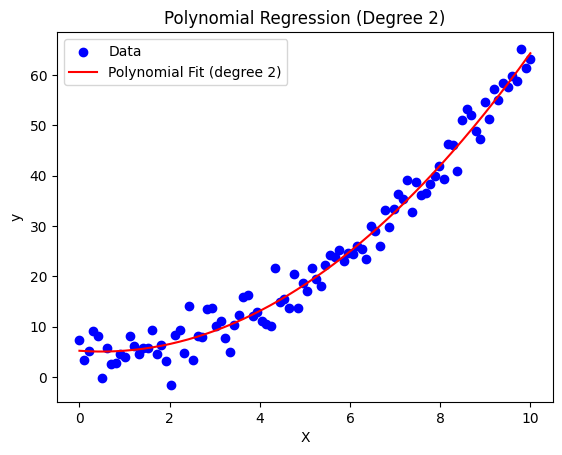

In [26]:
# Plot results
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label=f'Polynomial Fit (degree {degree})')
plt.legend()
plt.title(f"Polynomial Regression (Degree {degree})")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [27]:
print("Estimated coefficients:", coeffs.flatten())

Estimated coefficients: [ 5.18925184 -0.64319752  0.65539995]


💡 **Pro Tip:** This implementation uses the normal equation to find the coefficients. For large datasets, consider using gradient descent instead to improve computational efficiency.


### <a id='toc2_3_'></a>[Interpreting the Results](#toc0_)


When interpreting polynomial regression results, consider:

1. **Coefficient Interpretation:** In polynomial regression, coefficients represent the change in y for a one-unit change in x^n, holding other terms constant. The intercept (first coefficient) represents the expected value of y when all x terms are zero.

2. **Model Complexity:** Higher-degree polynomials can capture more complex relationships but risk overfitting. Always balance complexity with generalization ability.

3. **Visualizing the Fit:** Plotting the data and the fitted curve helps in understanding how well the model captures the underlying pattern.


⚠️ **Important Note:** Be cautious about extrapolating polynomial models beyond the range of your training data, as they can behave erratically.


### <a id='toc2_4_'></a>[Practical Considerations](#toc0_)


1. **Numerical Stability:** High-degree polynomials can lead to numerical instability. Consider normalizing your input features to mitigate this issue.

2. **Computational Complexity:** As the degree increases, so does the computational cost of fitting the model.

3. **Overfitting:** Higher-degree polynomials are prone to overfitting. In the next sections, we'll explore how to detect and address this issue.


🤔 **Why This Matters:** Implementing polynomial regression from scratch deepens your understanding of how these models work, making it easier to debug issues and adapt the technique to specific problems.


## <a id='toc3_'></a>[Overfitting in Polynomial Regression](#toc0_)

Overfitting is a critical concept in machine learning, and polynomial regression provides an excellent context for understanding this phenomenon. In this section, we'll explore what overfitting means, how it manifests in polynomial regression, and how to identify it.


Overfitting occurs when a model learns the training data too well, capturing noise and peculiarities specific to the training set rather than the underlying pattern. This results in poor generalization to new, unseen data.


<img src="./images/poly-overfit.jpg" width="800">

🔑 **Key Concept:** An overfit model performs well on training data but poorly on test data or new observations.


### <a id='toc3_1_'></a>[How Overfitting Manifests in Polynomial Regression](#toc0_)


In polynomial regression, overfitting typically occurs when we use a polynomial of too high a degree. Let's visualize this with an example:


In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Generate sample data
np.random.seed(0)
X = np.linspace(0, 1, 20).reshape(-1, 1)
y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.1, (20, 1))

In [39]:
# Function to fit polynomial regression
def fit_polynomial(X, y, degree):
    X_poly = np.polynomial.polynomial.polyvander(X.flatten(), degree)
    coeffs = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    return coeffs

In [40]:
# Function to make predictions
def predict_polynomial(X, coeffs):
    X_poly = np.polynomial.polynomial.polyvander(X.flatten(), len(coeffs)-1)
    return X_poly @ coeffs

In [41]:
# Fit polynomials of different degrees
degrees = [1, 3, 20]
X_test = np.linspace(0, 1, 100).reshape(-1, 1)

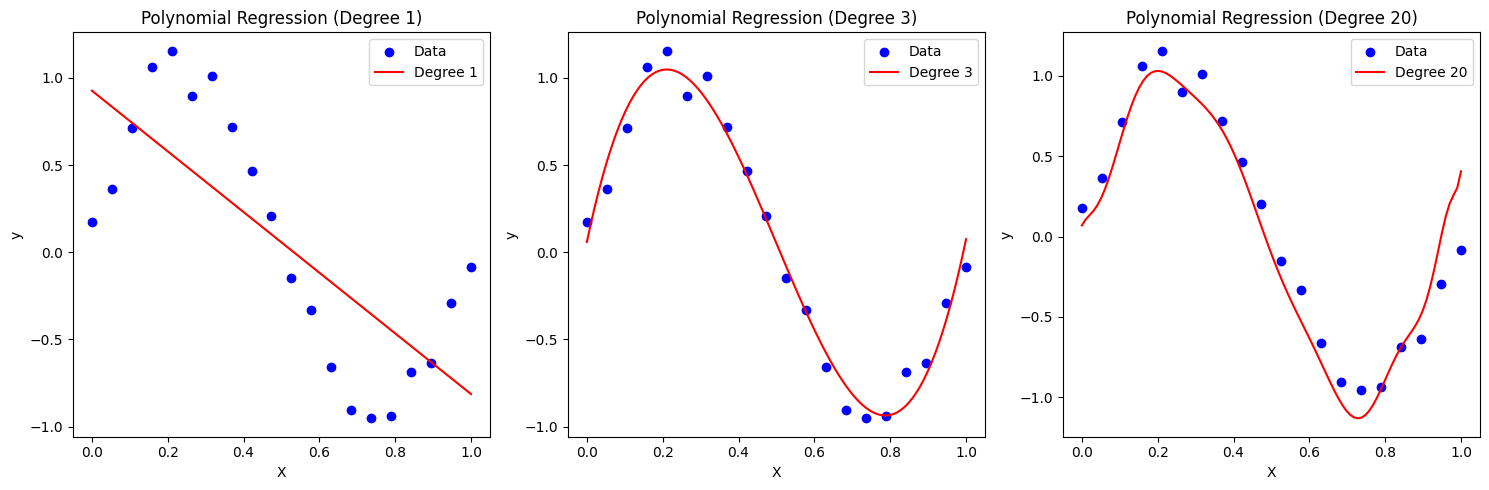

In [42]:
plt.figure(figsize=(15, 5))
for i, degree in enumerate(degrees):
    coeffs = fit_polynomial(X, y, degree)
    y_pred = predict_polynomial(X_test, coeffs)

    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X_test, y_pred, color='red', label=f'Degree {degree}')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

In this example, we can observe:
1. The linear model (degree 1) underfits, failing to capture the non-linear pattern.
2. The degree 3 polynomial provides a reasonable fit.
3. The degree 10 polynomial overfits, capturing noise in the data and creating an unrealistic, wiggly function.


### <a id='toc3_2_'></a>[Symptoms of Overfitting](#toc0_)


1. **High Variance:** The model is extremely sensitive to small fluctuations in the training data.
2. **Poor Generalization:** Performance on training data is significantly better than on test data.
3. **Complex Model:** The fitted function is unnecessarily complex, with many turns and wiggles.
4. **Counterintuitive Predictions:** The model may make unreasonable predictions, especially when extrapolating.


### <a id='toc3_3_'></a>[Demonstrating Overfitting with Examples](#toc0_)


Let's quantify overfitting by comparing training and test errors:


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [50]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# Function to compute MSE
def compute_mse(X, y, coeffs):
    y_pred = predict_polynomial(X, coeffs)
    return mean_squared_error(y, y_pred)

In [58]:
# Compute train and test errors for different degrees
degrees = range(1, 15)
train_errors = []
test_errors = []

for degree in degrees:
    coeffs = fit_polynomial(X_train, y_train, degree)
    train_errors.append(compute_mse(X_train, y_train, coeffs))
    test_errors.append(compute_mse(X_test, y_test, coeffs))

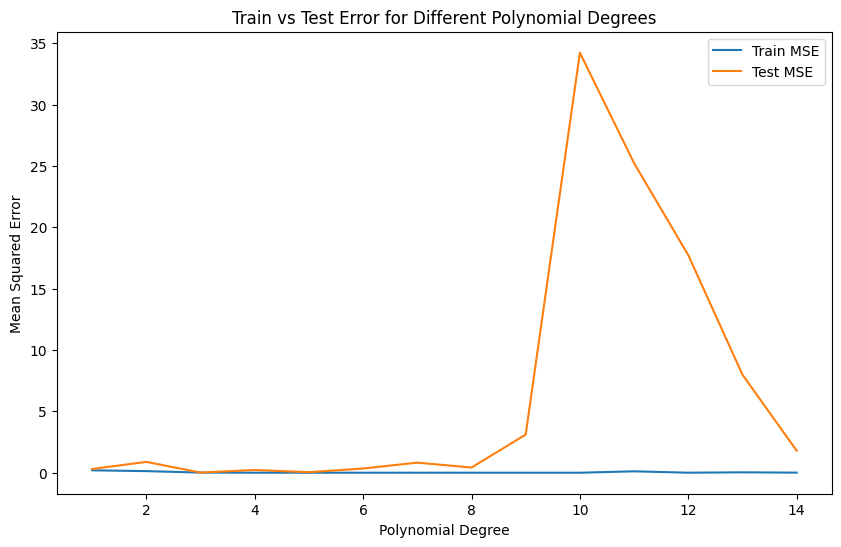

In [59]:
# Plot train vs test errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train MSE')
plt.plot(degrees, test_errors, label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Test Error for Different Polynomial Degrees')
plt.legend()
plt.show()

This plot illustrates:
1. As the degree increases, training error consistently decreases.
2. Test error initially decreases but then starts to increase.
3. The gap between training and test error widens with higher degrees, indicating overfitting.


> **Important Note:** The degree at which test error starts to increase can be considered the point where the model begins to overfit.


### <a id='toc3_4_'></a>[Practical Implications](#toc0_)


Understanding overfitting in polynomial regression is crucial because:
1. It helps in selecting the appropriate model complexity.
2. It illustrates the importance of using separate training and test sets.
3. It motivates the need for regularization techniques (which we'll cover in the next lecture).


🤔 **Why This Matters:** Recognizing and addressing overfitting is essential for building models that generalize well to new data, which is the ultimate goal in most machine learning applications.


In the next lecture, we'll dive deeper into the bias-variance tradeoff and introduce regularization techniques to combat overfitting while maintaining model flexibility.

## <a id='toc4_'></a>[Practical Considerations and Best Practices](#toc0_)

When working with polynomial regression, several practical considerations and best practices can help you build more effective and reliable models. Here are some key points to keep in mind:


### <a id='toc4_1_'></a>[Choosing the Right Polynomial Degree](#toc0_)


Selecting an appropriate degree for your polynomial model is crucial:

1. **Start Simple:** Begin with lower-degree polynomials and gradually increase complexity.
2. **Use Cross-Validation:** Employ techniques like k-fold cross-validation to assess model performance across different polynomial degrees.
3. **Watch for Overfitting:** Be cautious of high-degree polynomials that may fit noise in the data.


🔑 **Key Concept:** The goal is to find the simplest model that adequately captures the underlying pattern in your data.


### <a id='toc4_2_'></a>[Feature Scaling](#toc0_)


Polynomial features can quickly lead to large value ranges:


In [60]:
import numpy as np

X = np.array([1, 2, 3, 4, 5])
X_poly = np.column_stack([X, X**2, X**3])
print("Original X:", X)
print("Polynomial features:\n", X_poly)

Original X: [1 2 3 4 5]
Polynomial features:
 [[  1   1   1]
 [  2   4   8]
 [  3   9  27]
 [  4  16  64]
 [  5  25 125]]


To address this:

1. **Normalize Features:** Scale your input features before creating polynomial terms.
2. **Use Mean Normalization or Min-Max Scaling:** These techniques can help bring all features to a similar scale.


💡 **Pro Tip:** Proper scaling can improve numerical stability and help optimization algorithms converge faster.

### <a id='toc4_3_'></a>[Interpreting Polynomial Regression Results](#toc0_)


Interpreting polynomial models can be more challenging than linear models:

1. **Coefficient Interpretation:** Be cautious when interpreting individual coefficients, as they interact in complex ways.
2. **Visualize:** Whenever possible, plot your data and the fitted polynomial to gain intuition about the relationship.
3. **Focus on Trends:** Look at overall trends rather than specific point predictions, especially when extrapolating.


### <a id='toc4_4_'></a>[Extrapolation Caution](#toc0_)


Be extremely careful when using polynomial models to make predictions outside the range of your training data:


⚠️ **Important Note:** Polynomial functions can behave erratically when extrapolating, potentially leading to unrealistic predictions.


### <a id='toc4_5_'></a>[Computational Considerations](#toc0_)


As the degree of the polynomial increases, so does the computational complexity:

1. **Balance Complexity:** Higher-degree polynomials require more computation time and memory.
2. **Consider Alternatives:** For very high-dimensional data, consider other non-linear modeling techniques that may be more efficient.


### <a id='toc4_6_'></a>[Summary of Best Practices](#toc0_)


1. Start with lower-degree polynomials and increase complexity gradually.
2. Use cross-validation to select the optimal polynomial degree.
3. Scale your features before fitting the model.
4. Visualize your data and fitted model whenever possible.
5. Be cautious when interpreting coefficients and making extrapolations.
6. Handle outliers appropriately.
7. Consider computational resources when working with high-degree polynomials.


By following these practical considerations and best practices, you can more effectively apply polynomial regression to your data, avoiding common pitfalls and producing more reliable models.

## <a id='toc5_'></a>[Summary and Bridge to Regularization](#toc0_)

As we conclude our exploration of polynomial regression and overfitting, let's recap the key concepts we've covered and look ahead to the next important topic: regularization. Here's a brief summary of what we've learned:

1. **Polynomial Regression:**
   - Extends linear regression to capture non-linear relationships
   - Uses transformed features (x, x², x³, etc.) in a linear model
   - Offers flexibility in modeling complex patterns

2. **Implementation:**
   - Involves feature transformation and standard linear regression techniques
   - Can be implemented using numpy for both feature creation and model fitting

3. **Overfitting:**
   - Occurs when a model learns noise in the training data
   - Often happens with high-degree polynomials
   - Results in poor generalization to new data

4. **Model Evaluation:**
   - Importance of splitting data into training and test sets
   - Using metrics like MSE to compare performance on training and test data

5. **Practical Considerations:**
   - Choosing an appropriate polynomial degree
   - Scaling features to improve numerical stability
   - Cautious interpretation of results, especially for extrapolation


🔑 **Key Takeaway:** While polynomial regression is a powerful tool for modeling non-linear relationships, it comes with the risk of overfitting, especially as the degree of the polynomial increases.


As we've seen, there's often a tradeoff between model complexity and generalization:

- Simple models (low-degree polynomials) might underfit the data
- Complex models (high-degree polynomials) risk overfitting


This brings us to an important question: How can we create models that are flexible enough to capture complex patterns but still generalize well to new data? Finding this balance is crucial for creating models that are both accurate and reliable in real-world applications. Regularization techniques offer a solution to this challenge. They allow us to control model complexity and prevent overfitting without necessarily reducing the degree of the polynomial.


Key points about regularization:

1. **Purpose:** To penalize overly complex models
2. **Mechanism:** Adds a penalty term to the cost function based on the model's coefficients
3. **Types:** Common forms include Ridge Regression (L2) and Lasso Regression (L1)


💡 **Pro Tip:** Regularization can be thought of as a way to incorporate our preference for simpler models into the learning process.


In the next lecture, we'll dive deep into regularization techniques:

- Understanding the bias-variance tradeoff
- Implementing Ridge and Lasso regression
- Selecting optimal regularization parameters
- Applying regularization to polynomial regression models


By mastering these techniques, you'll be able to create more robust and generalizable models, not just for polynomial regression, but for a wide range of machine learning applications.


> **Important Note:** Regularization is a fundamental concept in machine learning that extends far beyond polynomial regression. The principles you'll learn are applicable to many other modeling techniques.


As we move forward, keep in mind that the goal is not just to fit the data perfectly, but to create models that capture true underlying patterns and perform well on new, unseen data. Regularization will be our key tool in achieving this balance.